In [315]:
import pandas as pd 
import numpy as np
import tensorflow.keras as tf

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt
import seaborn as sns

In [316]:
plt.rc('font',family = 'malgun gothic')

In [325]:
train = pd.read_csv('C:/Users/whileduck/Desktop/open/train.csv')
test = pd.read_csv('C:/Users/whileduck/Desktop/open/test.csv')

df = train.copy()

# 데이터 전처리

In [326]:
def preprocessing(data,degree):
    
    global train
    
    train_ = train.copy()
    
    data = data.drop(['ID'], axis = 1)
    train_ = train_.drop(['ID'], axis = 1)
    
    
    except_cols = ['Weight_Status','Gender','Calories_Burned']
    
    new_data = data.copy()
    new_train_ = train_.copy()
    
    if 'Calories_Burned' in data.columns.tolist():
        new_data = new_data.drop(except_cols, axis = 1)
        
        new_train_ = new_train_.drop(except_cols, axis = 1)
        
        poly = PolynomialFeatures(degree=degree) # 데이터의 복잡성을 올려주기 위해 PolynomialFeatures 사용
        
        poly.fit(new_train_)
        
        result = data[except_cols].join(pd.DataFrame(poly.transform(new_data)))
        return result.drop(0,axis = 1)
        
    else:
        new_data = new_data.drop(except_cols[:-1], axis = 1)
        new_train_ = new_train_.drop(except_cols, axis = 1)
        
        poly = PolynomialFeatures(degree=degree)
        poly.fit(new_train_) 
        
        
        result = data[except_cols[:-1]].join(pd.DataFrame(poly.transform(new_data)))
        
        return result.drop(0,axis = 1)
    

In [327]:
df = preprocessing(df,2)

df.head()

,Weight_Status,Gender,Calories_Burned,1,2,3,4,5,6,7,...,26,27,28,29,30,31,32,33,34,35
0,Normal Weight,F,166.0,26.0,105.6,107.0,5.0,9.0,154.3,45.0,...,25.0,45.0,771.5,225.0,81.0,1388.7,405.0,23808.49,6943.5,2025.0
1,Overweight,M,33.0,7.0,103.3,88.0,6.0,6.0,224.9,50.0,...,36.0,36.0,1349.4,300.0,36.0,1349.4,300.0,50580.01,11245.0,2500.0
2,Overweight,M,23.0,7.0,103.3,86.0,6.0,3.0,218.3,29.0,...,36.0,18.0,1309.8,174.0,9.0,654.9,87.0,47654.89,6330.7,841.0
3,Normal Weight,F,91.0,17.0,104.0,99.0,5.0,6.0,147.7,33.0,...,25.0,30.0,738.5,165.0,36.0,886.2,198.0,21815.29,4874.1,1089.0
4,Normal Weight,M,32.0,9.0,102.7,88.0,5.0,10.0,169.8,38.0,...,25.0,50.0,849.0,190.0,100.0,1698.0,380.0,28832.04,6452.4,1444.0


In [328]:
def min_max_scaler(data):
    
    cols = range(1,36)
    
    for col in cols:
        
        x = data[col]
        
        min_ = min(x)
        max_ = max(x)
        
        data[col] = (x - min_)/(max_ - min_)
        
    display(data.describe())

    return data
        
        

In [329]:
df = min_max_scaler(df)

,Calories_Burned,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,89.373467,0.500041,0.662478,0.449121,0.416267,0.476467,0.406244,0.383661,0.343814,0.493340,...,0.359386,0.438877,0.328942,0.351054,0.311948,0.313385,0.256443,0.282600,0.282958,0.291531
std,62.817086,0.288114,0.178841,0.162497,0.185554,0.291443,0.157411,0.286156,0.297370,0.286715,...,0.177824,0.255067,0.151014,0.226416,0.294347,0.203415,0.196443,0.144605,0.183983,0.274327
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.241379,0.569620,0.322034,0.333333,0.250000,0.281191,0.135593,0.070078,0.235972,...,0.272727,0.227273,0.219204,0.158537,0.062500,0.134169,0.105485,0.165723,0.136999,0.065742
50%,77.000000,0.482759,0.708861,0.440678,0.333333,0.500000,0.395558,0.322034,0.249166,0.476247,...,0.272727,0.454545,0.289578,0.304878,0.250000,0.290350,0.219409,0.258971,0.241440,0.191919
75%,138.000000,0.758621,0.797468,0.576271,0.666667,0.750000,0.531191,0.610169,0.587319,0.748786,...,0.606061,0.666667,0.476911,0.512195,0.562500,0.461761,0.363924,0.388928,0.396674,0.468413
max,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [330]:
def encoder(data):
    
    global train #data leakage 를 막기 위해 train set 에 있는 encoder 를 사용하도록 하자
    
    weight_encoder = OneHotEncoder()
    gender_encoder = OneHotEncoder()

    weight_encoder.fit(train[['Weight_Status']]) 
    gender_encoder.fit(train[['Gender']])
    
    weight_result = weight_encoder.transform(data[['Weight_Status']])
    gender_result = gender_encoder.transform(data[['Gender']])
    
    weight_train = pd.DataFrame.sparse.from_spmatrix(weight_result)
    gender_train = pd.DataFrame.sparse.from_spmatrix(gender_result)
    
    result = pd.concat([data,weight_train,gender_train],axis = 1).drop(['Weight_Status','Gender'], axis = 1)
    
    return result

In [331]:
df = encoder(df)
df.head(3)

,Calories_Burned,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,0,1,2,0,1
0,166.0,0.862069,0.860759,0.644068,0.333333,0.75,0.353970,0.423729,0.750834,0.856514,...,0.461761,0.427215,0.223334,0.274236,0.278206,1.0,0.0,0.0,1.0,0.0
1,33.0,0.206897,0.569620,0.322034,0.666667,0.50,0.687618,0.508475,0.053393,0.202026,...,0.448693,0.316456,0.564909,0.512087,0.359527,0.0,0.0,1.0,0.0,1.0
2,23.0,0.206897,0.569620,0.288136,0.666667,0.25,0.656427,0.152542,0.053393,0.202026,...,0.217763,0.091772,0.527587,0.240351,0.075501,0.0,0.0,1.0,0.0,1.0


In [332]:
def spliter(data):
    
    X = data.drop(['Calories_Burned'], axis = 1)
    Y = data[['Calories_Burned']]
    
    
    x_train,x_valid,y_train,y_valid = train_test_split(X,Y,test_size = 0.2)
    
    return x_train,x_valid,y_train,y_valid

In [333]:
x_train_full, x_test, y_train_full, y_test = spliter(df) # 마지막 테스트에 사용 할 validaion set 생성

In [334]:
x_train, x_valid, y_train, y_valid = spliter(x_train_full.join(y_train_full)) # early stopping 용 validaion set 생성

# 모델링

* Layer 와 Node에 따른 loss 값의 경향성을 보자

### Node 와 Layer 생성

In [336]:
def make_model(shape,node,layer):
    
    model = tf.Sequential()
    
    model.add(tf.layers.Flatten(input_shape = shape)) # input shape 생성
    # model.add(tf.layers.BatchNormalization(input_shape = shape)) # 배치 정규화를 시행해주자
    model.add(tf.layers.Flatten()) 
    
    for num in range(layer):
        model.add(tf.layers.Dense(node,activation = 'relu')) # 지정한 node 갯수만큼의 layer 생성
        
    model.add(tf.layers.Dense(1)) # 선형적 출력층 생성
    
    return model

* 여러 경우의 수의 기본 모델을 만들어 보고 가장 적절한 node 갯수와 layer 갯수를 찾아보자
* 변수들이 복잡해보이지 않으니 layer 갯수를 너무 많이 만들지는 말자

In [337]:
shape = x_train.shape[1:]
nodes = [10,50,100]  
layers = range(1,4)

models = {}

for node in nodes:
    for layer in layers:
        
        model = make_model(shape,node,layer)
        
        models[f'node : {node},layer : {layer}'] = model

In [338]:
models

{'node : 10,layer : 1': <keras.engine.sequential.Sequential at 0x1151aac2bb0>,
 'node : 10,layer : 2': <keras.engine.sequential.Sequential at 0x115482aaa00>,
 'node : 10,layer : 3': <keras.engine.sequential.Sequential at 0x1154829ee50>,
 'node : 50,layer : 1': <keras.engine.sequential.Sequential at 0x115495dd580>,
 'node : 50,layer : 2': <keras.engine.sequential.Sequential at 0x1154969aca0>,
 'node : 50,layer : 3': <keras.engine.sequential.Sequential at 0x115496883d0>,
 'node : 100,layer : 1': <keras.engine.sequential.Sequential at 0x1154968d400>,
 'node : 100,layer : 2': <keras.engine.sequential.Sequential at 0x115480cabe0>,
 'node : 100,layer : 3': <keras.engine.sequential.Sequential at 0x11526240730>}

In [339]:
def early_stop_fit(model):
    
    global x_train,y_train,x_valid,y_valid
    
    early_stopping = EarlyStopping(monitor='val_loss',
                                patience=100, mode='min', 
                                verbose=0, restore_best_weights=True)

    early_stopping.set_model(model) #early_stopping 생성
    
    
    weights = model.get_weights()
    
    for i in range(len(weights)):
        weights[i] = np.random.rand(*weights[i].shape) #가중치 랜덤하게 초기화
        
    model.set_weights(weights)
        
    
    history = model.fit(x_train,y_train,
                epochs = 9999,
                verbose = 0,
                validation_data = (x_valid,y_valid),
                callbacks = [early_stopping],
                batch_size = 128)
    
    return pd.DataFrame(history.history)
                    

### 무조건 배치 정규화를 하는 것이 학습의 안정성이 올라가는 줄 알았지만 꼭 그런 것만은 아닌 거 같다.

##### 작은 데이터셋

* 배치 정규화는 일반적으로 큰 데이터셋에서 더 잘 작동합니다. 작은 데이터셋에서는 배치 정규화가 불안정하거나 과적합 문제를 야기할 수 있습니다. 이러한 경우에는 배치 정규화를 적용하지 않는 것이 더 나을 수 있습니다.

##### 모델의 복잡도

* 복잡한 모델은 일반적으로 배치 정규화를 사용하여 학습을 안정화하는 데 더 많은 이점을 얻습니다. 그러나 간단한 모델에서는 배치 정규화가 불필요하거나 예측 성능을 악화시킬 수 있습니다.

##### 샘플링 방식

* 배치 정규화는 학습을 안정화하는 데 도움이 되는데, 이는 각 배치에서 샘플링된 작은 집합에 대해 작동합니다. 그러나 샘플링 방식에 따라 배치 정규화의 효과가 다를 수 있습니다. 예를 들어, 이미지 데이터에서 무작위로 샘플링하는 것은 배치 정규화를 효과적으로 사용할 수 있지만, 시계열 데이터와 같이 데이터가 순차적으로 생성되는 경우 배치 정규화가 효과적이지 않을 수 있습니다.

### 각 모델 별 train, validation set 의 학습 곡선을 보자

In [340]:
adam = tf.optimizers.legacy.Adam(learning_rate = 0.05)

params = {'loss' : 'mean_squared_error',
            'optimizer': adam ,
            'metrics':[RootMeanSquaredError()]}


results = {}

for condition,model in models.items():

    model.compile(**params)
    
    
    
    result= early_stop_fit(model)
                
    results[condition] = result
    
    print(condition, '진행 완료')

node : 10,layer : 1 진행 완료
node : 10,layer : 2 진행 완료
node : 10,layer : 3 진행 완료
node : 50,layer : 1 진행 완료
node : 50,layer : 2 진행 완료
node : 50,layer : 3 진행 완료
node : 100,layer : 1 진행 완료
node : 100,layer : 2 진행 완료
node : 100,layer : 3 진행 완료


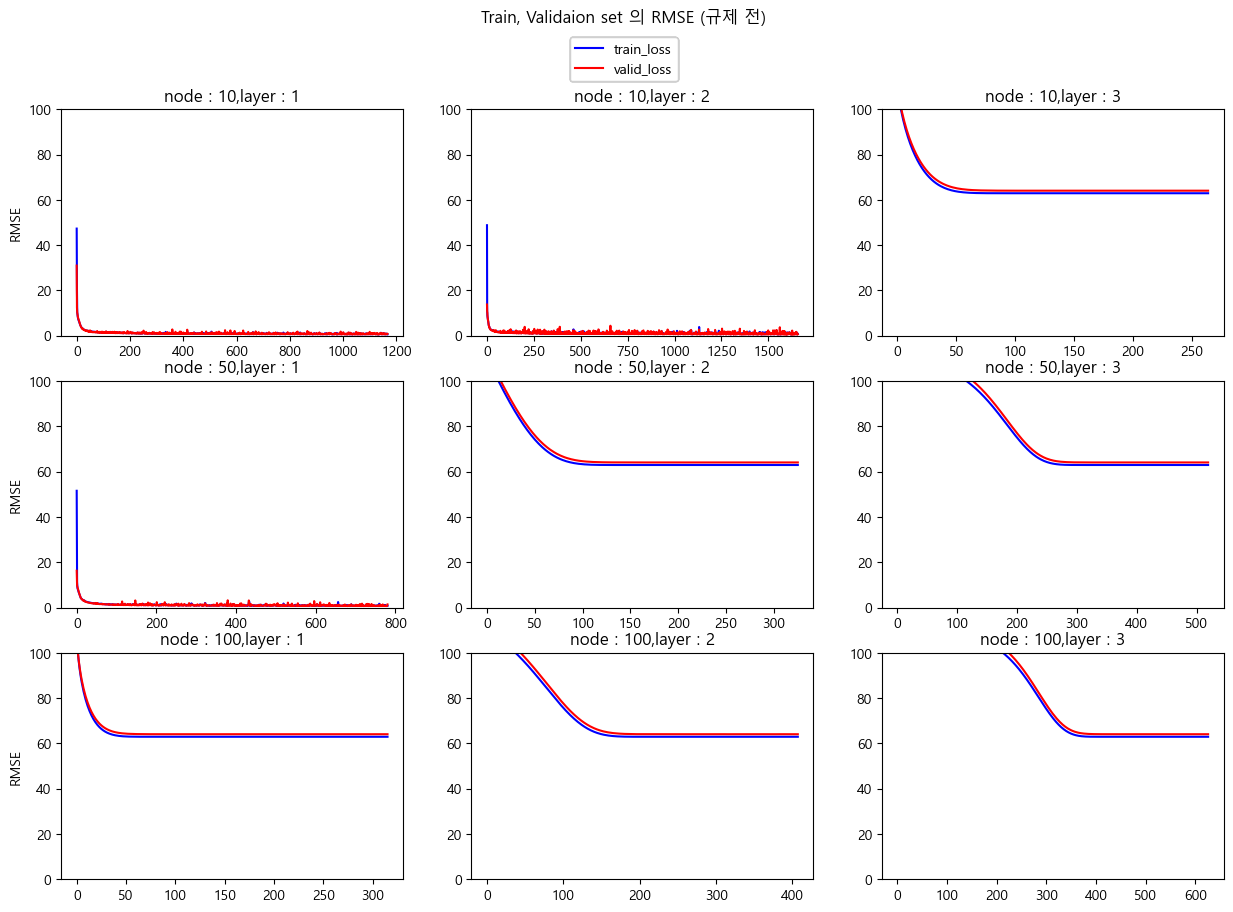

In [345]:
fig , ax = plt.subplots(nrows = 3, ncols = 3, 
                figsize = (15,10))

ax = ax.flatten()


for i,(title,var) in zip(range(len(results)),
                    results.items()):
        
    epochs = range(len(var))
    
    ax[i].plot(epochs,var['root_mean_squared_error'],
                label = 'train_RMSE',
                c = 'blue')
    
    ax[i].plot(epochs,var['val_root_mean_squared_error'],
                label = 'valid_RMSE',
                c = 'red')
    
    ax[i].set_ylim([0,100])
    ax[i].set_title(title)
    
    ax[0].set_ylabel('RMSE')
    ax[3].set_ylabel('RMSE')
    ax[6].set_ylabel('RMSE')
    
    
    fig.legend(['train_loss','valid_loss'],
                loc = 'center',
                bbox_to_anchor = (0.5,0.93),
                )
    fig.suptitle('Train, Validaion set 의 RMSE (규제 전)')

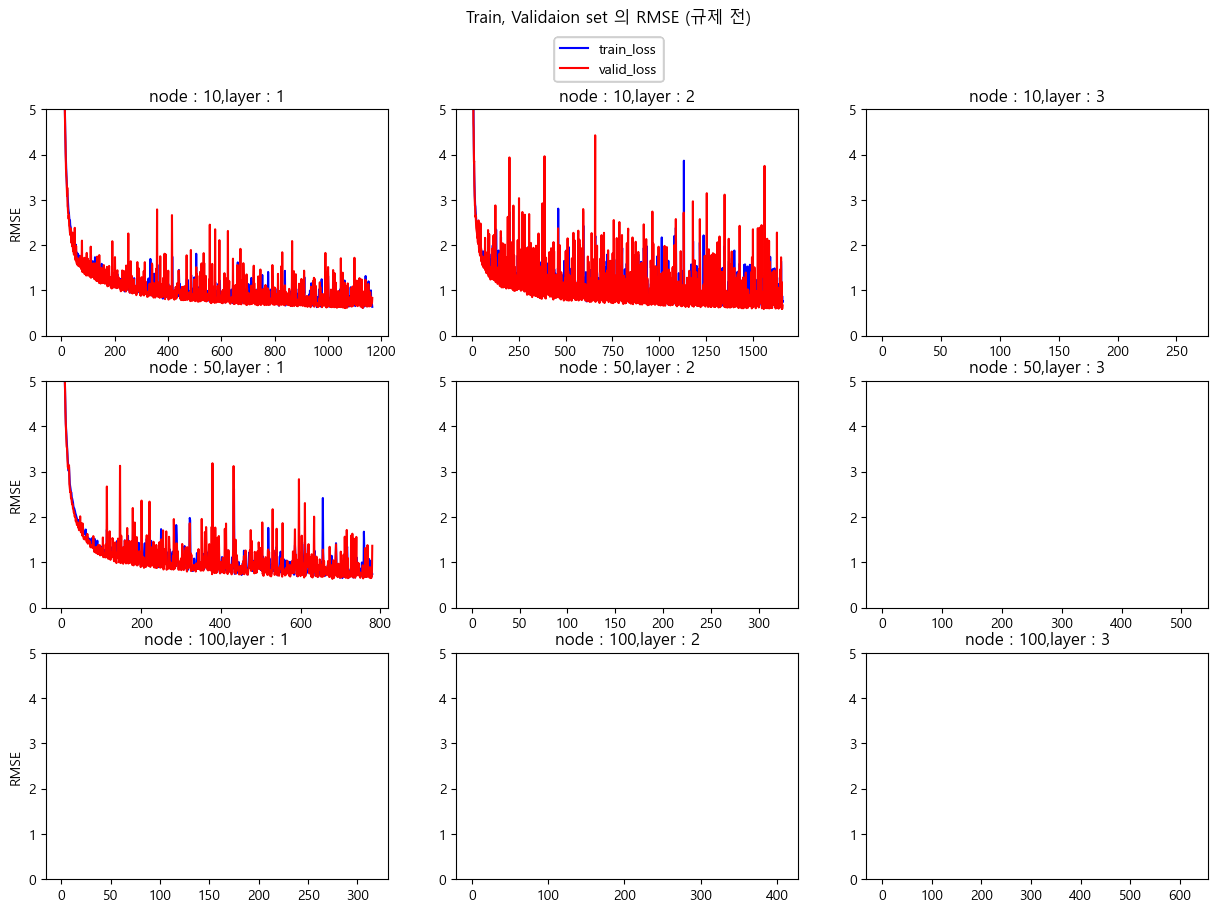

In [347]:
fig , ax = plt.subplots(nrows = 3, ncols = 3, 
                figsize = (15,10))

ax = ax.flatten()


for i,(title,var) in zip(range(len(results)),
                    results.items()):
        
    epochs = range(len(var))
    
    ax[i].plot(epochs,var['root_mean_squared_error'],
                label = 'train_RMSE',
                c = 'blue')
    
    ax[i].plot(epochs,var['val_root_mean_squared_error'],
                label = 'valid_RMSE',
                c = 'red')
    
    ax[i].set_ylim([0,5])
    ax[i].set_title(title)
    
    ax[0].set_ylabel('RMSE')
    ax[3].set_ylabel('RMSE')
    ax[6].set_ylabel('RMSE')
    
    
    fig.legend(['train_loss','valid_loss'],
                loc = 'center',
                bbox_to_anchor = (0.5,0.93),
                )
    fig.suptitle('Train, Validaion set 의 RMSE (규제 전)')

# 흠.. 모델이 복잡하지 않은 경우가 효과가 좋다

### 복잡하지 않은 모델들을 생성해보고 규제로 테스트를 해보자

In [348]:
def make_l2_model(shape,node,layer,alpha):
    
    model = tf.Sequential()
    
    model.add(tf.layers.Flatten(input_shape = shape)) # input shape 생성
    model.add(tf.layers.BatchNormalization(input_shape = shape)) # 배치 정규화를 시행해주자
    
    for num in range(layer):
        model.add(tf.layers.Dense(node,activation = 'relu',
                                kernel_regularizer=regularizers.l2(alpha)) # 지정한 node 갯수만큼의 layer 생성
                    ) # alpha 만큼의 L2 규제 생성
        
    model.add(tf.layers.Dense(1)) # 선형적 출력층 생성
    
    return model

In [349]:
shape = x_train.shape[1:]
nodes = [16,32,64]  
layers = range(1,3)
alpha = 0.1 # L2 규제를 0.1 만 주고 해보자


models = {}

for node in nodes:
    for layer in layers:
        
        model = make_l2_model(shape,node,layer, alpha)
        
        models[f'node : {node},layer : {layer}, alpha {alpha}'] = model

In [350]:
models

{'node : 16,layer : 1, alpha 0.1': <keras.engine.sequential.Sequential at 0x1154da9ad00>,
 'node : 16,layer : 2, alpha 0.1': <keras.engine.sequential.Sequential at 0x11539e45ee0>,
 'node : 32,layer : 1, alpha 0.1': <keras.engine.sequential.Sequential at 0x1153e82cb20>,
 'node : 32,layer : 2, alpha 0.1': <keras.engine.sequential.Sequential at 0x1153e83ff40>,
 'node : 64,layer : 1, alpha 0.1': <keras.engine.sequential.Sequential at 0x1153e847370>,
 'node : 64,layer : 2, alpha 0.1': <keras.engine.sequential.Sequential at 0x1153e879940>}

In [351]:
adam = tf.optimizers.legacy.Adam(learning_rate = 0.05)

params = {'loss' : 'mean_squared_error',
            'optimizer': adam ,
            'metrics':[RootMeanSquaredError()]}


results = {}

for condition,model in models.items():

    model.compile(**params)
    
    
    
    result= early_stop_fit(model)
                
    results[condition] = result
    
    print(condition, '진행 완료')

node : 16,layer : 1, alpha 0.1 진행 완료
node : 16,layer : 2, alpha 0.1 진행 완료
node : 32,layer : 1, alpha 0.1 진행 완료
node : 32,layer : 2, alpha 0.1 진행 완료
node : 64,layer : 1, alpha 0.1 진행 완료
node : 64,layer : 2, alpha 0.1 진행 완료


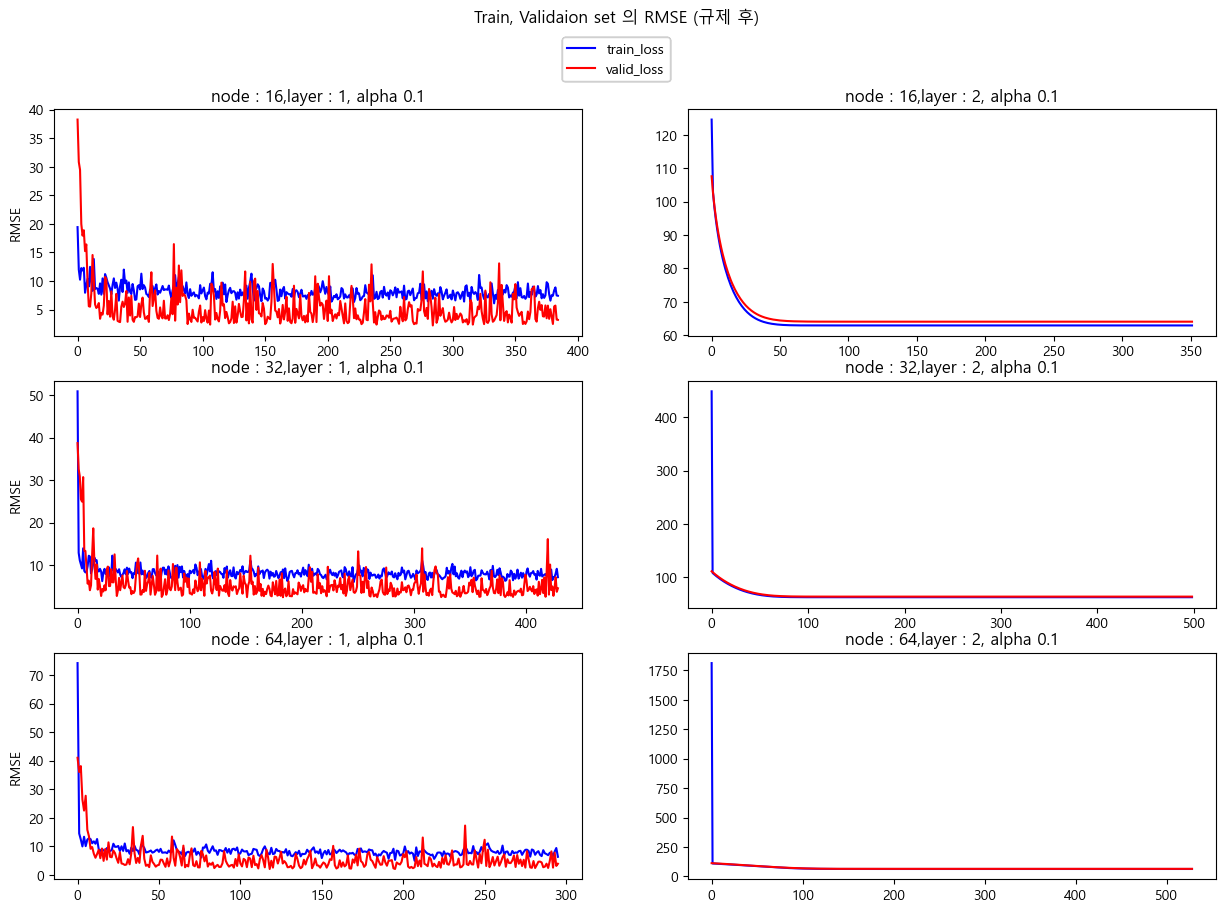

In [353]:
fig , ax = plt.subplots(nrows = 3, ncols = 2, 
                figsize = (15,10))

ax = ax.flatten()


for i,(title,var) in zip(range(len(results)),
                    results.items()):
        
    epochs = range(len(var))
    
    ax[i].plot(epochs,var['root_mean_squared_error'],
                label = 'train_RMSE',
                c = 'blue')
    
    ax[i].plot(epochs,var['val_root_mean_squared_error'],
                label = 'valid_RMSE',
                c = 'red')
    
    ax[i].set_title(title)
    
    ax[0].set_ylabel('RMSE')
    ax[2].set_ylabel('RMSE')
    ax[4].set_ylabel('RMSE')
    
    
    fig.legend(['train_loss','valid_loss'],
                loc = 'center',
                bbox_to_anchor = (0.5,0.93),
                )
    fig.suptitle('Train, Validaion set 의 RMSE (규제 후)')

### 규제를 주지 않는 경우가 더욱 성능이 좋았다.

### 예측 시작

In [378]:
adam = tf.optimizers.legacy.Adam(learning_rate = 0.05)

params = {'loss' : 'mean_squared_error',
            'optimizer': adam ,
            'metrics':[RootMeanSquaredError()]}

In [386]:
model = make_model(x_train.shape[1:], 10,1)

model.compile(**params)

history= model.fit(x_train_full,y_train_full,
            epochs = 1000,
            verbose = 0)

In [388]:
model.evaluate(x_test,y_test)

47/47 [==============================] - 0s 623us/step - loss: 0.7315 - root_mean_squared_error: 0.8553


[0.73151034116745, 0.855283796787262]

In [389]:
model.fit(x_train_full,y_train_full,
            epochs = 1000,
            verbose = 0)

In [357]:
test = preprocessing(test,2)

test = min_max_scaler(test)

test = encoder(test)

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,0.502069,0.656909,0.509624,0.415689,0.476244,0.410219,0.388875,0.344515,0.493404,0.428220,...,0.358760,0.401883,0.333224,0.369229,0.312357,0.293792,0.257648,0.294052,0.282138,0.297162
std,0.285635,0.180775,0.171070,0.184812,0.292506,0.166263,0.289433,0.294795,0.283140,0.265919,...,0.177168,0.234773,0.157074,0.237912,0.295529,0.191462,0.197735,0.154430,0.176565,0.277309
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.241379,0.558442,0.375000,0.333333,0.250000,0.277722,0.135593,0.070078,0.235783,0.195796,...,0.272727,0.208333,0.219059,0.164975,0.062500,0.126031,0.105485,0.168985,0.137646,0.065742
50%,0.517241,0.701299,0.517857,0.333333,0.416667,0.399698,0.338983,0.283648,0.505545,0.413187,...,0.272727,0.416667,0.292830,0.324873,0.173611,0.272676,0.215190,0.269632,0.245248,0.205444
75%,0.758621,0.792208,0.642857,0.666667,0.750000,0.544355,0.610169,0.587319,0.744391,0.649582,...,0.606061,0.611111,0.481161,0.543147,0.562500,0.433846,0.369198,0.409902,0.395481,0.468413
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [391]:
sub = pd.read_csv('C:/Users/whileduck/Desktop/open/sample_submission.csv')

sub['Calories_Burned'] = model.predict(test)

235/235 [==============================] - 0s 497us/step


In [393]:
sub

,Calories_Burned
ID,
TEST_0000,195.751678
TEST_0001,231.722214
TEST_0002,66.192207
TEST_0003,195.903442
TEST_0004,253.087326
...,...
TEST_7495,235.546646
TEST_7496,14.066620
TEST_7497,148.986298
